# <center>PR 2</center>
# <center>Expectation Decider</center>

In [65]:
import pandas as pd
import numpy as np
df = pd.read_csv('expectation_decider_dataset.csv')
df.head()

,study_hours,attendance,group_discussion,previous_test_score,final_exam_pass
0,12.0,84.0,Yes,75.0,Pass
1,9.4,79.0,No,76.0,Fail
2,12.6,92.0,No,92.0,Pass
3,16.1,100.0,Yes,100.0,Pass
4,9.1,59.0,No,68.0,Fail


## <center>Understanding the Basics</center>

In [66]:
'''
    What is probability?
    -> Probability is the likelihood of an event occurring. It is expressed as a number between 0 (impossible) and 1 (certainty). Like the likelihood of tails when I toos a coin.

    Key terminologies in probability?
    ->
        Experiment: Any process that has an uncertain outcome.

        Outcome: A single possible result of an experiment.

        Sample Space: The set of all possible outcomes. For a standard 6-sided die, the sample space is {1, 2, 3, 4, 5, 6}.

        Event: A specific outcome or set of outcomes we are interested in.
'''

'\n    What is probability?\n    -> Probability is the likelihood of an event occurring. It is expressed as a number between 0 (impossible) and 1 (certainty). Like the likelihood of tails when I toos a coin.\n\n    Key terminologies in probability?\n    ->\n        Experiment: Any process that has an uncertain outcome.\n\n        Outcome: A single possible result of an experiment.\n\n        Sample Space: The set of all possible outcomes. For a standard 6-sided die, the sample space is {1, 2, 3, 4, 5, 6}.\n\n        Event: A specific outcome or set of outcomes we are interested in.\n'

In [67]:
prob_study_hour_less_3 = len(df[df['study_hours']<5]) / len(df)
print(f'Probability of study hours less than 3: {prob_study_hour_less_3}')

prob_attendance_less_50 = len(df[df['attendance']<50]) / len(df)
print(f'Probability of attendance less than 50%: {prob_attendance_less_50}')

prob_students_in_group_discussion = len(df[df['group_discussion']=='Yes']) / len(df)
print(f'Probability of students in group discussion: {prob_students_in_group_discussion}')


Probability of study hours less than 3: 0.09
Probability of attendance less than 50%: 0.04
Probability of students in group discussion: 0.68


## <center>Types of Events</center>

In [68]:
# Empirical Probability
prob_student_pass = len(df[df['final_exam_pass'] == 'Pass']) / len(df)
print(f'Probability of student passes in final exam: {prob_student_pass}')

# Theoretical Probability
sample_space = ["pass","fail"]
prob_pass = 1 / 2
print(f"Probability of passing: {prob_pass}")

Probability of student passes in final exam: 0.55
Probability of passing: 0.5


## <center>Random Variable & Probability Distribution</center>

In [69]:
random_sample = (0,1,2,3)

p = prob_student_pass
f = 1 - p

print(f"Probability of One Student Passing (p): {p:.2f}")
print(f"Probability of One Student Failing (f): {f:.2f}")

# 1. Zero pass
prob_0 = 1 * (f * f * f)
# 2. One pass
prob_1 = 3 * (p * f * f)
# 3. Two pass
prob_2 = 3 * (p * p * f)
# 4. Three pass
prob_3 = 1 * (p * p * p)

print("\nProbability Distribution Table:")
print(f"0 Students Pass: {prob_0:.4f}")
print(f"1 Student Passes: {prob_1:.4f}")
print(f"2 Students Pass: {prob_2:.4f}")
print(f"3 Students Pass: {prob_3:.4f}")

prob = np.array([prob_0, prob_1, prob_2, prob_3])

mean_val = np.sum(prob * random_sample)
variance_val = sum(((random_sample - mean_val) ** 2) * prob)

print(f"\nMean: {mean_val:.3f}")
print(f"Variance: {variance_val:.3f}")


Probability of One Student Passing (p): 0.55
Probability of One Student Failing (f): 0.45

Probability Distribution Table:
0 Students Pass: 0.0911
1 Student Passes: 0.3341
2 Students Pass: 0.4084
3 Students Pass: 0.1664

Mean: 1.650
Variance: 0.742


## <center>Venn Diagram in Probability</center>

Left Circle Only (Study > 10): 40
Right Circle Only (Attend > 80): 15
Center Overlap (Both): 59


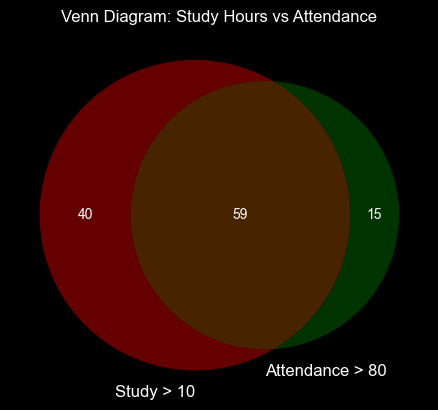

In [70]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

set_A_count = len(df[df['study_hours'] > 10])
set_B_count = len(df[df['attendance'] > 80])

overlap_count = len(df[(df['study_hours'] > 10) & (df['attendance'] > 80)])

only_A = set_A_count - overlap_count
only_B = set_B_count - overlap_count

print(f"Left Circle Only (Study > 10): {only_A}")
print(f"Right Circle Only (Attend > 80): {only_B}")
print(f"Center Overlap (Both): {overlap_count}")

plt.title("Venn Diagram: Study Hours vs Attendance")
venn2(subsets=(only_A,only_B,overlap_count),set_labels=("Study > 10", "Attendance > 80"))
plt.show()

## <center>Contingency Table & Probability Calculations</center>

In [71]:
contingency_table = pd.crosstab(df["group_discussion"],df["final_exam_pass"],margins=True)
contingency_table

final_exam_pass,Fail,Pass,All
group_discussion,,,
No,45,19,64
Yes,45,91,136
All,90,110,200


In [72]:
joint_probability_table = pd.crosstab(df["group_discussion"],df["final_exam_pass"],normalize=True,margins=True)
joint_probability_table

final_exam_pass,Fail,Pass,All
group_discussion,,,
No,0.225,0.095,0.32
Yes,0.225,0.455,0.68
All,0.450,0.550,1.00


In [73]:
prob_marginal= prob_student_pass
print(f'Probability of student passes in final exam: {prob_marginal}')

prob_pass_given_group_discussion = len(df[(df['group_discussion']=='Yes') & (df['final_exam_pass']=='Pass')]) / len(df[df['group_discussion']=='Yes'])
print(f'Probability of student passes given that they are in group discussion: {prob_pass_given_group_discussion}')

Probability of student passes in final exam: 0.55
Probability of student passes given that they are in group discussion: 0.6691176470588235


## <center>Understanding Relationships</center>

In [74]:
'''
    1.
        -> The whole idea of conditional probability is figuring out the odds of something happening only because something else already happened. Instead of looking at every single person in your data (the whole table), you zoom in on just the specific group that fits your "given" condition.

    2.
        -> Based on the data, there is a strong correlation between group discussions and exam performance:
        
             High Correlation: Students who participated in group discussions saw a significantly higher success rate, with over 80% of that group passing the exam.

             Dependency: Because zero students passed without attending the discussions, we can conclude these two events are dependent. The outcome of the exam is heavily influenced by the attendance of the discussion.
'''

'\n    1.\n        -> The whole idea of conditional probability is figuring out the odds of something happening only because something else already happened. Instead of looking at every single person in your data (the whole table), you zoom in on just the specific group that fits your "given" condition.\n\n    2.\n        -> Based on the data, there is a strong correlation between group discussions and exam performance:\n\n             High Correlation: Students who participated in group discussions saw a significantly higher success rate, with over 80% of that group passing the exam.\n\n             Dependency: Because zero students passed without attending the discussions, we can conclude these two events are dependent. The outcome of the exam is heavily influenced by the attendance of the discussion.\n'

## <center>Bayes Theorem Application</center>

In [75]:
prob_pass = prob_student_pass
prob_fail = 1 - prob_pass

prob_high_attendance = len(df[df['attendance'] > 80]) / len(df)
prob_high_given_pass =  len(df[(df['final_exam_pass']=='Pass') &(df['attendance'] > 80)]) / len(df[df['final_exam_pass']=='Pass'])
prob_high_given_fail =  len(df[(df['final_exam_pass']=='Fail') &(df['attendance'] > 80)]) / len(df[df['final_exam_pass']=='Fail'])

prob_pass_given_high_attendance = (prob_high_given_pass * prob_pass) / prob_high_attendance

print(f'Probability of student passes in final exam: {prob_pass:.2f}')
print(f'Probability of student fails in final exam: {prob_fail:.2f}')
print(f'Probability of student having high attendance given pass: {prob_high_given_pass:.2f}')
print(f'Probability of student having high attendance given fail: {prob_high_given_fail:.2f}')
print(f'Bayes Theorem: {prob_pass_given_high_attendance:.2f}')

Probability of student passes in final exam: 0.55
Probability of student fails in final exam: 0.45
Probability of student having high attendance given pass: 0.60
Probability of student having high attendance given fail: 0.09
Bayes Theorem: 0.89
